# **Artifitial Neural Networks (ANN) with TensorFlow**

TensorFlow is an open-source machine learning library developed by Google, specifically designed for building and training neural networks with high flexibility and performance.
- It includes Keras, a high-level API for building neural networks easily.
- Optimized for both large-scale and small-scale models.
- Flexible and scalable for research and production.

## **TensorFlow Neural Network Components**

### **Keras API**
- High-level neural network construction
- Simplified model building
- Seamless integration with TensorFlow backend

### **Key TensorFlow Neural Network Layers**
- Dense (Fully Connected) Layers
- Convolutional Layers
- Recurrent Layers
- Embedding Layers
- Dropout Layers
- Batch Normalization Layers

## **Training Configuration/Parameters**

**Optimizers:** Adam, SGD, RMSprop


**Loss Functions:** Binary Crossentropy, Categorical Crossentropy, Mean Squared Error


**Metrics:** Accuracy, Precision, Recall



## **Advanced TensorFlow Training Techniques**

**Callbacks:** Early Stopping, Learning Rate Scheduling, Model Checkpointing


**Data Preprocessing:** tf.data API, Input Pipeline, Optimization, Data Augmentation


##**Performance Optimization**
- GPU Acceleration
- XLA (Accelerated Linear Algebra)
- Mixed Precision Training
- Distributed Training Strategies

##**Model Saving and Deployment**
- SavedModel Format
- TensorFlow Serving
- TensorFlow Lite (Mobile/Edge Deployment)
- TensorFlow.js (Web Deployment)

#**Building an ANN with TensorFlow**
## **Step 1: Understanding the Sequential Model**
The Sequential class in Keras allows you to build a model layer-by-layer.
Each layer is added sequentially, making it ideal for simple feedforward networks.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create a simple ANN model


# MODEL ARCHITECTURE
num_features = 4
model = Sequential([
                    Dense(4, input_dim=num_features, activation='relu'), # Hidden layer 1
                    Dense(units=8, activation='relu'), # Hidden layer 2
                    Dense(units=1, activation='sigmoid') # Output layer
                    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##**Step 2: Compiling the Model**
###**Key Parameters in compile:**
**optimizer:** Algorithm used to adjust weights and biases. Common optimizers include:
- **adam:** Combines the best properties of RMSprop and - SGD, often used by default.
- **sgd:** Stochastic Gradient Descent.
- **rmsprop:** Adaptive learning rate method.

**loss:** Measures the difference between predicted and true values.
- **binary_crossentropy** for binary classification.
- **categorical_crossentropy** for multi-class classification.

**metrics:** Metrics used to evaluate the model's performance (e.g., accuracy).

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

##**Step 3: Training the Model**
### **Key Parameters in fit:**
**batch_size:** Number of samples processed before updating the model’s weights. Smaller batch_size leads to faster updates but more noise. Common values: 32, 64, 128.


**epochs:** Number of times the entire dataset is passed through the model.
Too many epochs can lead to overfitting.


**validation_split:** Fraction of the training data used for validation. Helps monitor the model's performance on unseen data during training.


**verbose:** Controls the amount of output displayed during training.

- 0: No output.
- 1: Progress bar for each epoch.
- 2: One line per epoch.

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epoch= 100,
                    validation_split=0.2,
                    verbose = 1
                    )

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# define the model
model = Sequential([
                    Dense(50, input_dim=X_train.shape[1], activation='relu'), # Hidden layer 1
                    BatchNormalization(),
                    Dropout(0.3),

                    Dense(units=100, activation='relu'), # Hidden layer 2
                    BatchNormalization(),
                    Dropout(0.5),

                    Dense(units=50, activation='relu'), # Hidden layer 2

                    Dense(units=1, activation='sigmoid') # Output layer
                    ])
#Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# Train the model
history = model.fit(X_train,y_train,
                    validation_split=0.2,
                    epochs =100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7832 - loss: 0.4836 - val_accuracy: 0.9670 - val_loss: 0.1847
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9355 - loss: 0.1412 - val_accuracy: 0.9560 - val_loss: 0.1198
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9531 - loss: 0.1627 - val_accuracy: 0.9670 - val_loss: 0.0953
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9613 - loss: 0.1355 - val_accuracy: 0.9780 - val_loss: 0.0950
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9582 - loss: 0.1001 - val_accuracy: 0.9780 - val_loss: 0.0874
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9846 - loss: 0.0481 - val_accuracy: 0.9560 - val_loss: 0.0824
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9665 - loss: 0.0739 - val_accuracy: 0.9780 - val_loss: 0.0817
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9402 - loss: 0.1420 - val_accuracy: 0.9890 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9558 - loss: 0.1119 
Test Accuracy: 0.9649122953414917
Test Loss: 0.09645091742277145


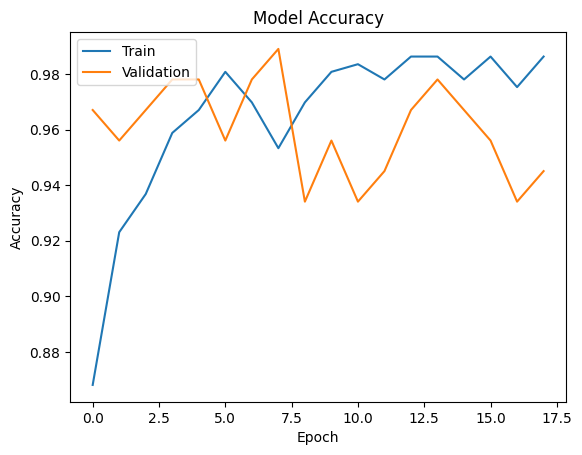

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

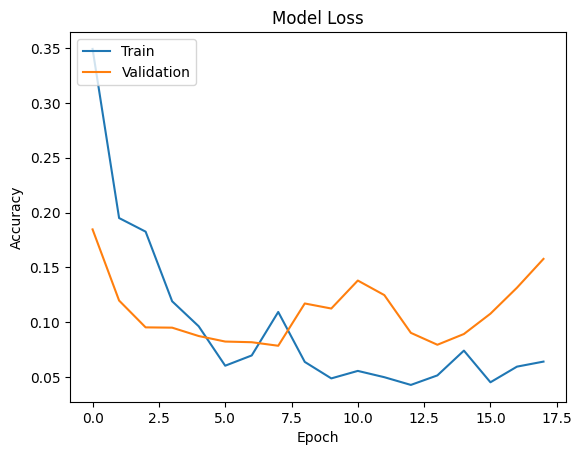

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Building the Advanced ANN**
### 1. **Adding Dropout Layers**
Dropout is a regularization technique that randomly "drops" neurons during training, reducing overfitting by preventing the network from becoming too reliant on specific neurons.
- **Dropout rate:** Proportion of neurons to drop (e.g., 0.5 means 50% of neurons are dropped).
- Applied only during training, not during evaluation.

### 2. **Adding Batch Normalization**
Batch Normalization normalizes the input of each layer to improve training speed and stability, ensuring that the mean activation is close to zero and the standard deviation is close to one.
- Accelerates training.
- Reduces sensitivity to initialization.
- Acts as a form of regularization.


### 3. **Using Early Stopping**
Early Stopping halts training when the validation performance stops improving, preventing overfitting.
- **monitor:** Metric to monitor (e.g., 'val_loss').
- **patience:** Number of epochs to wait before stopping.

### **4. Learning Rate Schedules**
Adjusting the learning rate dynamically during training can improve convergence and reduce training time. TensorFlow offers several schedules:
- **Exponential Decay:** Reduces the learning rate exponentially over epochs.
- **Piecewise Constant Decay:** Uses different learning rates for different ranges of epochs.
- **Cyclic Learning Rates:** Cycles between a lower and upper learning rate.

### **5. Regularization**
Regularization prevents overfitting by adding penalties to the loss function.

- **L1 Regularization:** Adds the absolute values of weights to the loss function.
- **L2 Regularization (Ridge):** Adds the squared values of weights (default in Keras).
- **Elastic Net:** Combines L1 and L2 regularization.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing

#Load data
data = fetch_california_housing()
X,y = data.data, data.target

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Building architecture
- compile model
- train

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([
    Dense(20, activation='relu', input_dim=(X_train.shape[1])),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

#Defining LR Schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.5
)

# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['r2_score'])

#Early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    verbose=1,
                    validation_split= 0.3,
                    callbacks=[early_stopping]
)

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.6090 - r2_score: -0.1418 - val_loss: 0.6043 - val_r2_score: 0.5517
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3857 - r2_score: 0.7113 - val_loss: 0.4109 - val_r2_score: 0.6952
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3630 - r2_score: 0.7291 - val_loss: 0.3604 - val_r2_score: 0.7327
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3532 - r2_score: 0.7379 - val_loss: 0.3587 - val_r2_score: 0.7339
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3208 - r2_score: 0.7546 - val_loss: 0.3741 - val_r2_score: 0.7225
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3402 - r2_score: 0.7463 - val_loss: 0.3750 - val_r2_score: 0.7218
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3335 - r2_score: 0.7529 - val_loss: 0.3779 - val_r2_score: 0.7197
Epoch 8/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3346 - r2_score: 0.7416 - val_los